# ML Lab 3
### Abhishek Satapathy 17BCE1326
--- 


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("../Datasets/regression/Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 33 columns):
Sl.No.                327 non-null int64
Load                  327 non-null int64
Biogas flow rate      327 non-null int64
methane fraction      327 non-null int64
Intake temperature    327 non-null int64
CO2                   327 non-null float64
CO                    327 non-null float64
HC                    327 non-null int64
O2                    327 non-null float64
Smoke                 327 non-null float64
Nox                   327 non-null int64
Pb (kW)               327 non-null float64
ṁf1 (kg/s)            327 non-null float64
ṁf2 (kg/s)            327 non-null float64
% pilot fuel          327 non-null float64
% Energy of pilot     327 non-null float64
ɳBT (%)               327 non-null float64
ɳvol (%)              327 non-null float64
BSEC                  327 non-null object
A/F Ratio             327 non-null float64
ER                    327 non-null float64
Pm     

In [4]:
df.describe()

Sl.No.        Load  Biogas flow rate  methane fraction  \
count  327.000000  327.000000        327.000000        327.000000   
mean   164.000000   12.510703          8.220183         72.171254   
std     94.540996    5.687602          5.219168         21.217426   
min      1.000000    0.000000          0.000000          0.000000   
25%     82.500000    7.500000          4.000000         50.000000   
50%    164.000000   15.000000          8.000000         65.000000   
75%    245.500000   20.000000         12.000000         80.000000   
max    327.000000   23.000000         16.000000        100.000000   

       Intake temperature         CO2          CO          HC          O2  \
count          327.000000  327.000000  327.000000  327.000000  327.000000   
mean            68.027523    5.933364    0.168654  255.192661   12.027492   
std             24.350631    1.934399    0.062519  150.119736    2.747977   
min             35.000000    2.100000    0.070000   51.000000    5.510000   
25%             35.000000    4.360000    0.120000  137.000000   10.010000   
50%             60.000000    5.840000    0.170000  216.000000   12.110000   
75%             80.000000    7.405000    0.200000  345.500000   14.530000   
max            100.000000   11.330000    0.510000  793.000000   17.670000   

            Smoke  ...   A/F Ratio          ER          Pm      Pm(CA)  \
count  327.000000  ...  327.000000  327.000000  325.000000  325.000000   
mean    32.199388  ...   27.707578    0.477613   53.360685  363.704615   
std     10.876177  ...   10.282497    0.129287    9.364413    1.991993   
min     10.000000  ...   10.588094    0.165363   25.751905  356.000000   
25%     24.000000  ...   20.047151    0.379425   45.873438  362.000000   
50%     31.000000  ...   25.648714    0.467649   51.165739  363.000000   
75%     41.000000  ...   33.271898    0.562531   59.909180  365.000000   
max     70.400000  ...   87.685665    0.803662   77.823946  370.000000   

            dp/dt         ID          CD        CA50    Max. HRR       CO2.1  
count  325.000000  325.00000  325.000000  325.000000  325.000000  327.000000  
mean     4.907856   23.32000   88.824615   38.064615   40.704830    5.933364  
std      2.566874    2.25717   10.548317    8.109997   19.854611    1.934399  
min      1.027848   18.00000   34.000000   18.000000   10.687868    2.100000  
25%      2.837837   22.00000   84.000000   33.000000   24.428617    4.360000  
50%      4.044529   23.00000   89.000000   37.000000   33.492090    5.840000  
75%      6.688750   25.00000   96.000000   42.000000   53.649353    7.405000  
max     13.065473   31.00000  125.000000   80.000000  107.882316   11.330000  

[8 rows x 28 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a3d9f5908>,
      dtype=object)

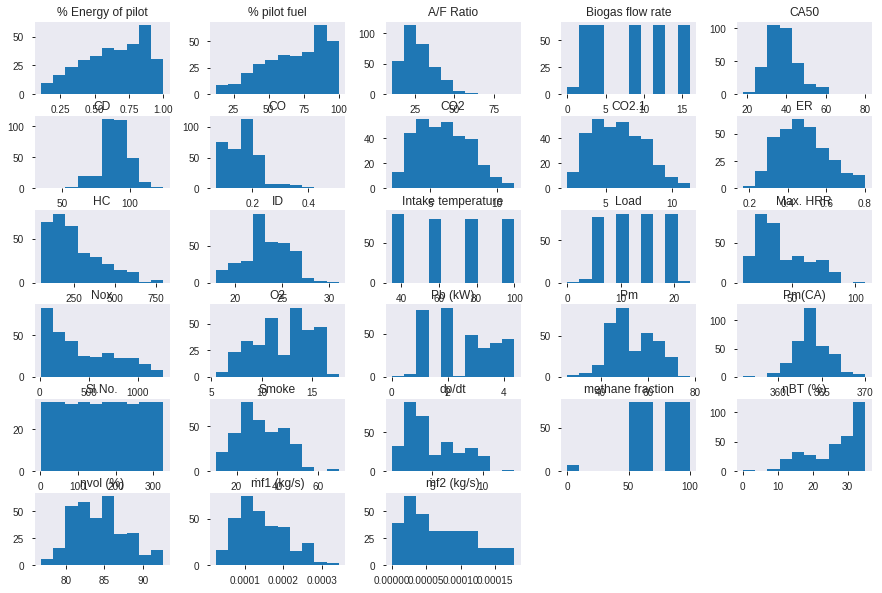

In [5]:
import matplotlib.pyplot as plt
df.hist(figsize=(15,10),grid=False)

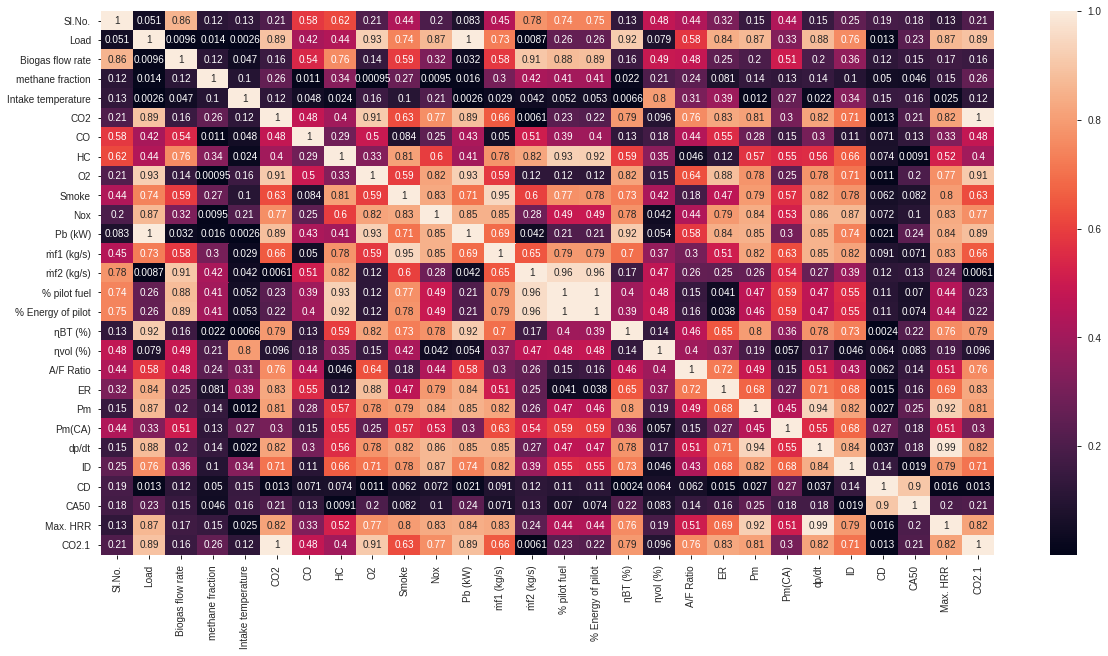

In [6]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)
plt.show()

In [7]:
# df = df.drop(columns="Load")
df = df.drop(columns="% pilot fuel")

In [8]:
df.dtypes

Sl.No.                  int64
Load                    int64
Biogas flow rate        int64
methane fraction        int64
Intake temperature      int64
CO2                   float64
CO                    float64
HC                      int64
O2                    float64
Smoke                 float64
Nox                     int64
Pb (kW)               float64
ṁf1 (kg/s)            float64
ṁf2 (kg/s)            float64
% Energy of pilot     float64
ɳBT (%)               float64
ɳvol (%)              float64
BSEC                   object
A/F Ratio             float64
ER                    float64
Pm                    float64
Pm(CA)                float64
dp/dt                 float64
ID                    float64
CD                    float64
CA50                  float64
Max. HRR              float64
BSFC                   object
CO2.1                 float64
HC.1                   object
CO.1                   object
NOx                    object
dtype: object

In [9]:
df.replace(to_replace =["###", "#DIV/0!"],  
                            value ="0")
df["ID"].fillna(0, inplace = True) 
df.isnull().any()

Sl.No.                False
Load                  False
Biogas flow rate      False
methane fraction      False
Intake temperature    False
CO2                   False
CO                    False
HC                    False
O2                    False
Smoke                 False
Nox                   False
Pb (kW)               False
ṁf1 (kg/s)            False
ṁf2 (kg/s)            False
% Energy of pilot     False
ɳBT (%)               False
ɳvol (%)              False
BSEC                  False
A/F Ratio             False
ER                    False
Pm                     True
Pm(CA)                 True
dp/dt                  True
ID                    False
CD                     True
CA50                   True
Max. HRR               True
BSFC                  False
CO2.1                 False
HC.1                  False
CO.1                  False
NOx                   False
dtype: bool

In [10]:
df["Pm"].fillna(df["Pm"].mean(), inplace = True) 
df["Pm(CA)"].fillna(df["Pm(CA)"].mean(), inplace = True) 
df["dp/dt"].fillna(df["dp/dt"].mean(), inplace = True) 
df["CD"].fillna(df["CD"].mean(), inplace = True) 
df["CA50"].fillna(df["CA50"].mean(), inplace = True) 
df["Max. HRR"].fillna(df["Max. HRR"].mean(), inplace = True) 

In [11]:
df.isnull().any()
df.dtypes

Sl.No.                  int64
Load                    int64
Biogas flow rate        int64
methane fraction        int64
Intake temperature      int64
CO2                   float64
CO                    float64
HC                      int64
O2                    float64
Smoke                 float64
Nox                     int64
Pb (kW)               float64
ṁf1 (kg/s)            float64
ṁf2 (kg/s)            float64
% Energy of pilot     float64
ɳBT (%)               float64
ɳvol (%)              float64
BSEC                   object
A/F Ratio             float64
ER                    float64
Pm                    float64
Pm(CA)                float64
dp/dt                 float64
ID                    float64
CD                    float64
CA50                  float64
Max. HRR              float64
BSFC                   object
CO2.1                 float64
HC.1                   object
CO.1                   object
NOx                    object
dtype: object

In [13]:
import pandas_profiling
df.profile_report()